In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
# Check data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Check null values
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
# We have null values in  'Age' column
# To fill null values of 'Age' column with mean of 'Age' column
# First find the mean of 'Age' column
m=int(df['Age'].mean())
print(m)

# To fill null values with mean of Age column
df['Age'].fillna(m,inplace=True)  # inplace=true  .... permenantly fill with mean
df.isnull().sum()   # ..... to check null values

29


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Since null values in 'Cabin' column is more than 50%,
# we drop this column.
df.drop('Cabin',inplace=True,axis=1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
# Clearing null values in 'Embarked' column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Filling null values of 'Embarked' column with 'S'
df['Embarked'].fillna('S',inplace=True)  # inplace=true  .... permenantly fill with mean

df.isnull().sum()   # ..... to check null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

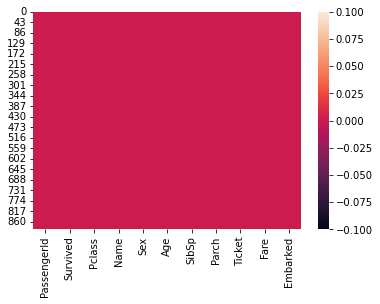

In [11]:
# Now we Visualise null values
sns.heatmap(df.isnull())
plt.show()

The null values have now been cleared from datset

In [12]:
# Check duplicates
df.duplicated().sum()

0

In [13]:
# Check how many samples are there in 'Survived' column
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

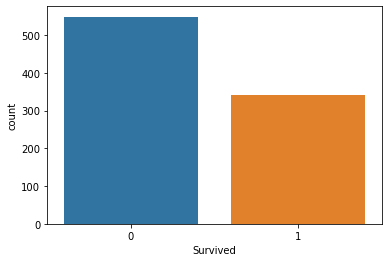

In [14]:
# Visualise 
sns.countplot(data=df,x='Survived')
plt.show()

In [15]:
#separate numerical type column and object type column and store in new dataset
df_num=df.select_dtypes(["int64","float64"])#hold to int and float type data 
df_cat=df.select_dtypes(object)#hold object type data

In [16]:
# Now change object type into numerical type data by using 
# LabelEncoder
# For that we first import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
for col in df_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    df_cat[col]=le.fit_transform(df_cat[col])

In [18]:
# Cross check if object type data is convertted into numeric type
df_cat.head()

,Name,Sex,Ticket,Embarked
0,108,1,523,2
1,190,0,596,0
2,353,0,669,2
3,272,0,49,2
4,15,1,472,2


In [19]:
df_cat.dtypes
# We see the columns with dtat type as object have been successfully converted to int.

Name        int64
Sex         int64
Ticket      int64
Embarked    int64
dtype: object

In [20]:
# Concatenate() means to join 2 dataset df_num and df_cat
df1=pd.concat([df_num,df_cat],axis=1)
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,2


In [21]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int64
Sex              int64
Ticket           int64
Embarked         int64
dtype: object

Spliting dataset into Input and Output

In [22]:
X=df1.drop('Survived',axis=1)   # Input
Y=df1['Survived']   # Output

In [23]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,3,22.0,1,0,7.2500,108,1,523,2
1,2,1,38.0,1,0,71.2833,190,0,596,0
2,3,3,26.0,0,0,7.9250,353,0,669,2
3,4,1,35.0,1,0,53.1000,272,0,49,2
4,5,3,35.0,0,0,8.0500,15,1,472,2


In [24]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
# Now we apply train_test_split (i.e split dataset in 70% for training and 30% for testing)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
# First apply StandardScaler on input data(X_train,X_test) before training the data
# Applying StandardScaler on X_train,X_test
from sklearn.preprocessing import StandardScaler
# Create an object of StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [27]:
#create a function
def create_model(model): 
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [28]:
X_train

array([[-1.29438938,  0.80278702, -0.96927958, ..., -1.36783323,
        -0.86336997, -1.99957926],
       [ 1.70073081, -0.40527171, -0.14031752, ..., -1.36783323,
         1.1772294 , -1.99957926],
       [-1.44414539,  0.80278702, -0.06495734, ...,  0.73108328,
         0.05208689,  0.56895245],
       ...,
       [-1.45990918, -0.40527171, -0.66783883, ...,  0.73108328,
         1.41248647,  0.56895245],
       [-0.81753472,  0.80278702, -0.06495734, ..., -1.36783323,
         1.69888638,  0.56895245],
       [-1.59784234,  0.80278702, -0.66783883, ...,  0.73108328,
         0.86525807,  0.56895245]])

In [29]:
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [30]:
# Create an object of LogisticRegression class
lr=LogisticRegression()

In [31]:
# To train the model with 70% data use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [32]:
# Test the model with 30% data use inbuilt method predict().
Y_pred=lr.predict(X_test)
Y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0])

In [33]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
623,0,0
148,0,0
3,1,1
34,0,0
241,1,1


In [34]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)     # Score always varies between 0-1

0.7761194029850746

In [35]:
#Generate Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       153
           1       0.76      0.70      0.73       115

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.77       268



In [37]:
print(confusion_matrix(Y_test,Y_pred))

[[127  26]
 [ 34  81]]


In [38]:
# Next apply DecisionTreeClassifier
# Perform Dataset with help of DecisionTreeClassifier
# Call DicisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Create an object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)
# call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

[[126  27]
 [ 38  77]]


In [40]:
#create the object of DecisionTreeClassifier class
#dt=DecisionTreeClassifier(random_state=1) #by entropy 
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy') 

In [41]:
# Call the function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       153
           1       0.72      0.61      0.66       115

    accuracy                           0.73       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268

[[126  27]
 [ 45  70]]


In [42]:
# Show the information gain of all input features
IG=dt.feature_importances_
print('information Gain : ', IG)
# feature_importances_   is inbuilt method of DecisionTreeClassifier class

information Gain :  [0.09369935 0.09916996 0.09307179 0.03830278 0.00704043 0.0657687
 0.10959637 0.32100818 0.1347672  0.03757525]


In [43]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name', 'Sex',
       'Ticket', 'Embarked'],
      dtype='object')

In [44]:
dict={'Inputs':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Inputs,IG
7,Sex,0.321008
8,Ticket,0.134767
6,Name,0.109596
1,Pclass,0.099170
0,PassengerId,0.093699
2,Age,0.093072
5,Fare,0.065769
3,SibSp,0.038303
9,Embarked,0.037575
4,Parch,0.007040


In [45]:
I=X.columns

In [46]:
# 1st pruning technique : To overfitting
#1. max_depth parameter .Create object of DecisionTreeClassifier class and passing the parameter max_depth.

In [47]:
# Creating an object of DecisionTreeClassifier class and passing it through parameter
dt1=DecisionTreeClassifier(random_state=1,max_depth=8)

In [48]:
# Call the function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[132  21]
 [ 42  73]]


In [49]:
# Check with different values of max_depth
# create object of DicisionTreeClassifier class and pass parameter max_depth
dt2=DecisionTreeClassifier(random_state=1,max_depth=6)

In [50]:
# Call the function
dt2=create_model(dt2) 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[133  20]
 [ 43  72]]


In [51]:
# Check with different values of max_depth
# create object of DicisionTreeClassifier class and pass parameter max_depth
dt3=DecisionTreeClassifier(random_state=1,max_depth=3)

In [52]:
# Call the function
dt3=create_model(dt3) 

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       153
           1       0.85      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[141  12]
 [ 49  66]]


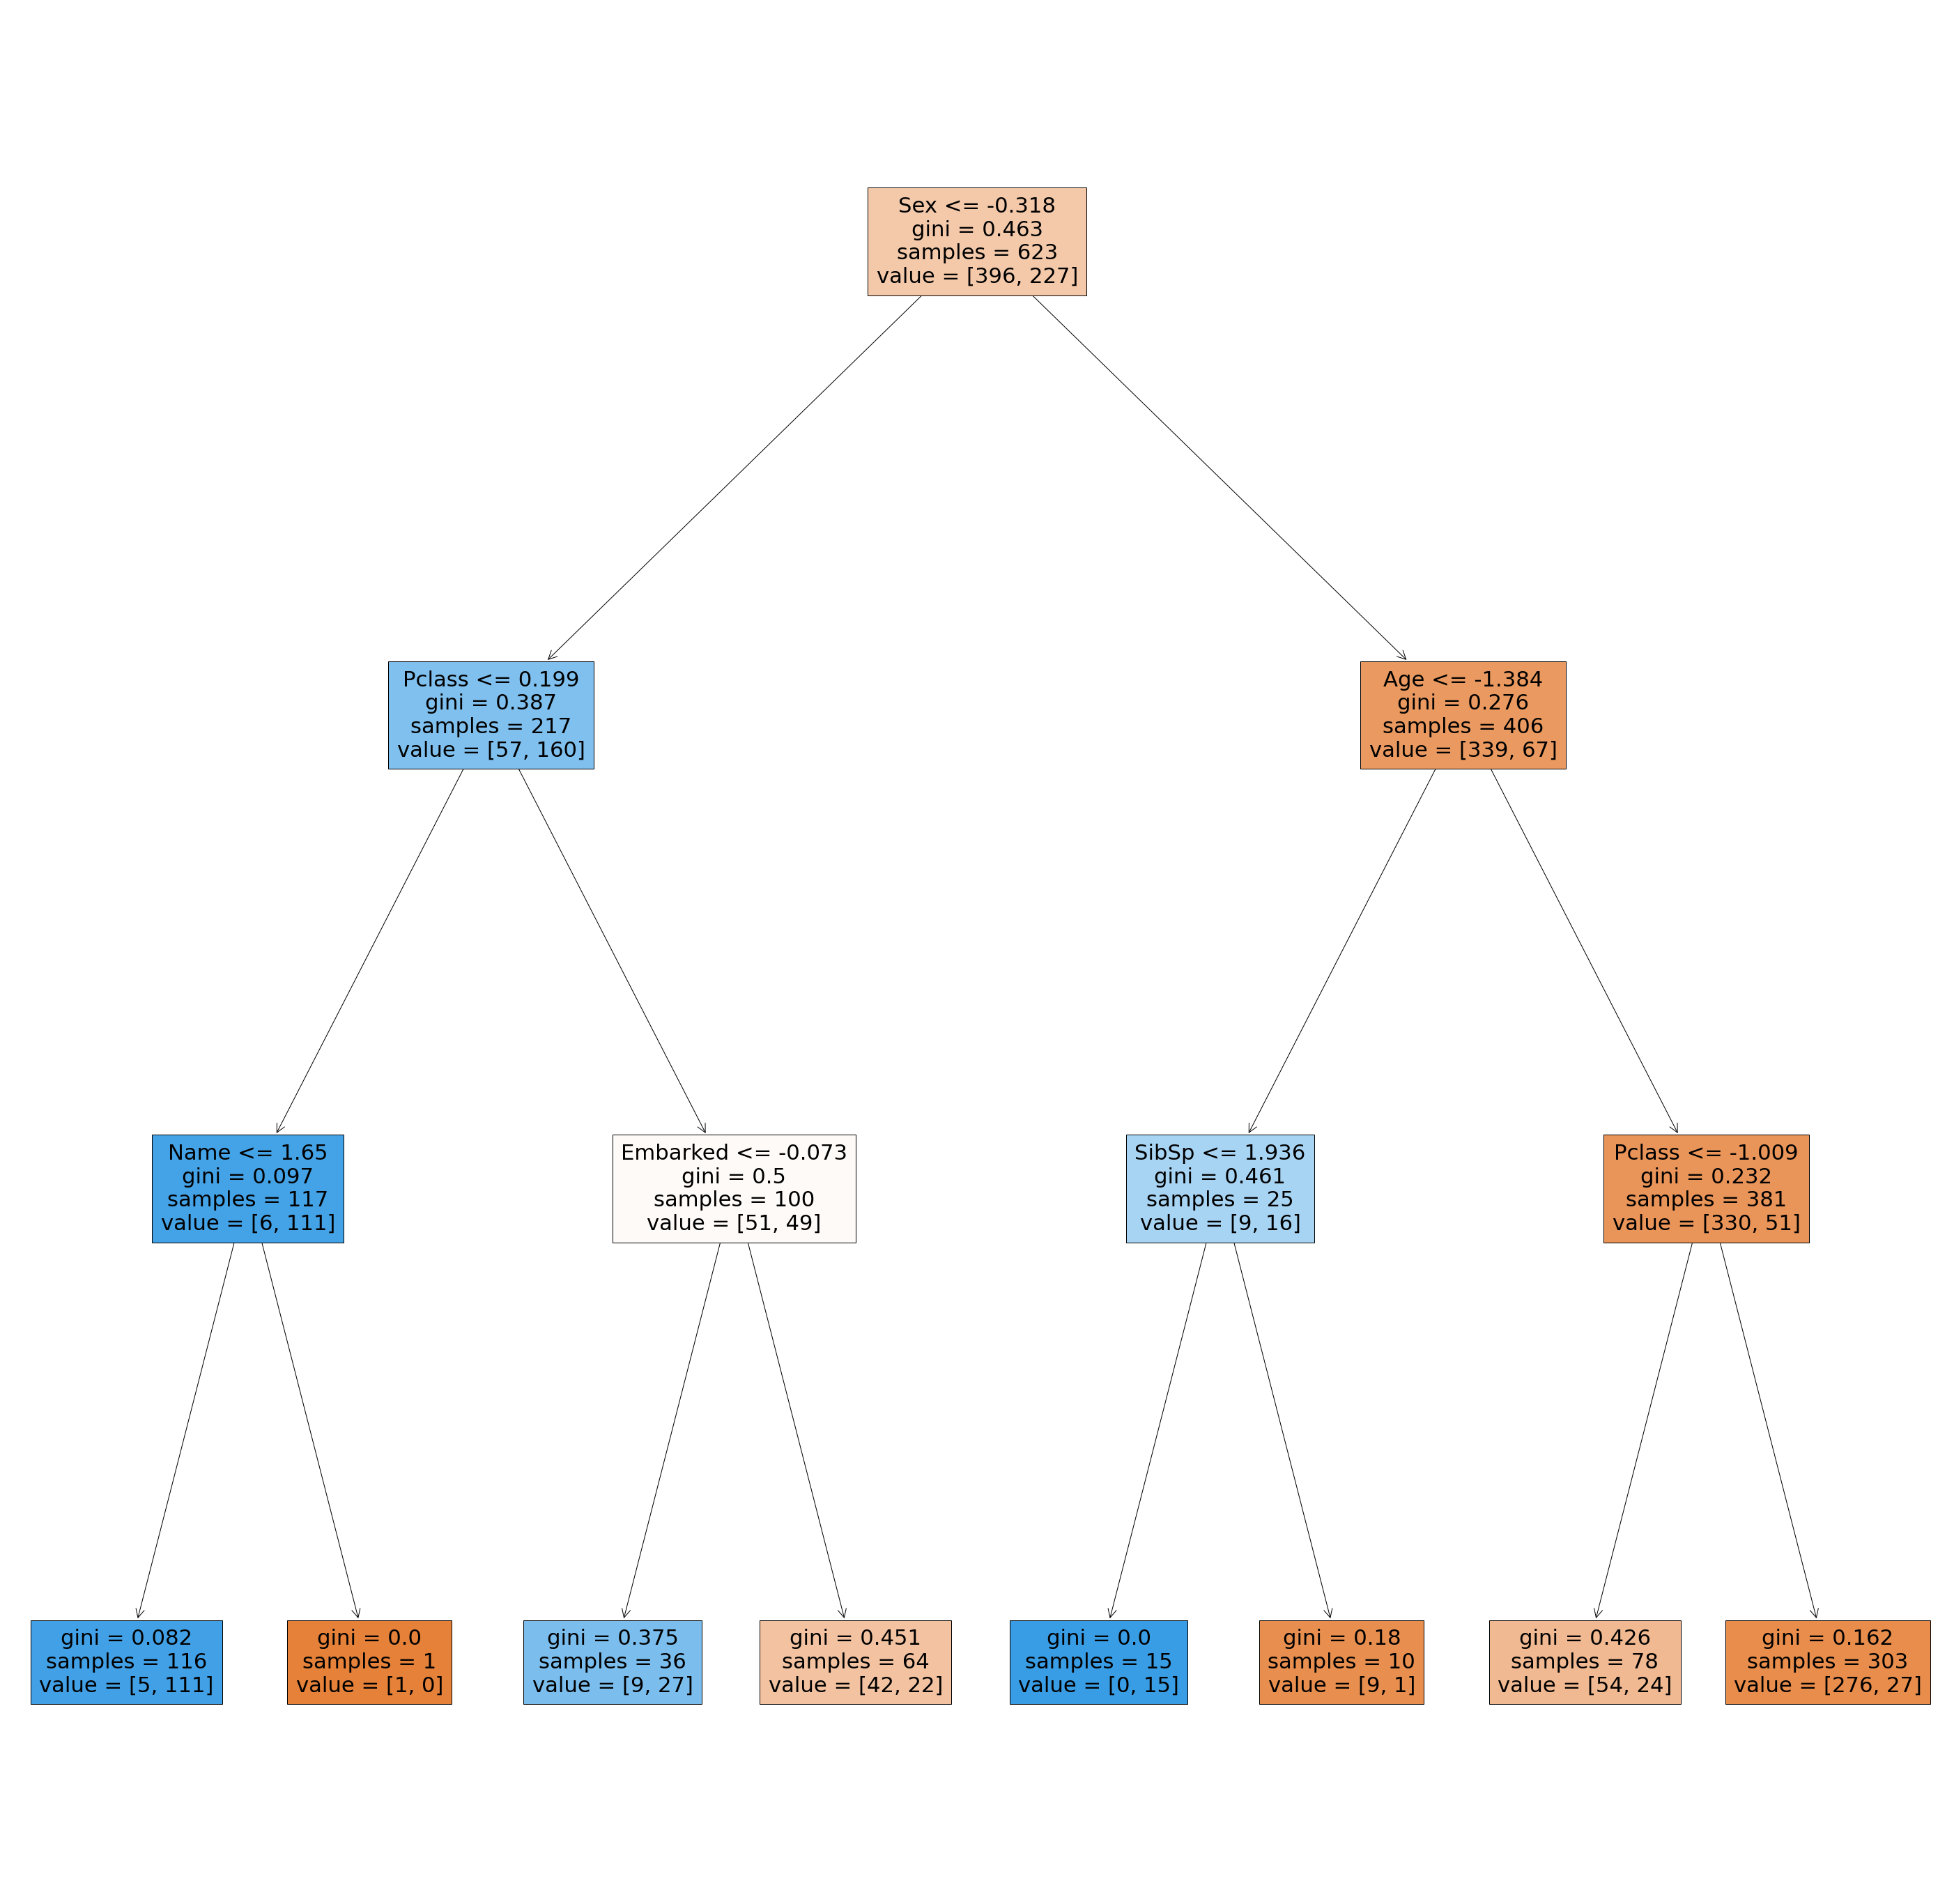

In [53]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(50,50))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [54]:
#create a dictrony
IG=dt3.feature_importances_
dict={'Input':X.columns,'IG':IG} 
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False) #decending order according to IG

,Input,IG
7,Sex,0.607787
1,Pclass,0.187765
2,Age,0.078865
3,SibSp,0.063773
9,Embarked,0.049897
6,Name,0.011913
0,PassengerId,0.000000
4,Parch,0.000000
5,Fare,0.000000
8,Ticket,0.000000


In [55]:
#pruning technique : to reduced overfitting
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45 and max=100
##create object of DecisionTreeClassifier class
#leaf node means no child
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)

In [56]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[142  11]
 [ 50  65]]


In [57]:
# Check Min Sample Leaf at different levels

for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[142  11]
 [ 50  65]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       153
           1       0.89      0.55      0.68       115

    accuracy                           0.78       268
   macro avg       0.81      0.75      0.75       268
weighted avg       0.80      0.78      0.76       268

[[145   8]
 [ 52  63]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       153
           1       0.94      0.43      0.60       115

    accuracy                           0.75       268
   macro avg       

In [58]:
for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
  # By default Gini
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[142  11]
 [ 50  65]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       153
           1       0.89      0.55      0.68       115

    accuracy                           0.78       268
   macro avg       0.81      0.75      0.75       268
weighted avg       0.80      0.78      0.76       268

[[145   8]
 [ 52  63]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       153
           1       0.94      0.43      0.60       115

    accuracy                           0.75       268
   macro avg       

Random Forest Classifier

In [59]:
X.shape

(891, 10)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Create an object of RandomForestClassifier
for i in range(1,200):
    rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1)
    # bydefault gini
    # call function
    print('no. of features',i)
    rfc=create_model(rfc)

no. of features 1
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       153
           1       0.73      0.60      0.66       115

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.74      0.73       268

[[128  25]
 [ 46  69]]
no. of features 2
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       153
           1       0.83      0.51      0.63       115

    accuracy                           0.75       268
   macro avg       0.77      0.72      0.72       268
weighted avg       0.77      0.75      0.73       268

[[141  12]
 [ 56  59]]
no. of features 3
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       153
           1       0.74      0.60      0.66       115

    accuracy                           0.74       268
   macro avg       0.74     

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

[[135  18]
 [ 43  72]]
no. of features 25
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.79      0.64      0.71       115

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[133  20]
 [ 41  74]]
no. of features 26
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.71       115

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

[[133  20]
 [ 42  73]]
no. of features 48
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[133  20]
 [ 43  72]]
no. of features 49
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

[[133  20]
 [ 42  73]]
no. of features 72
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[133  20]
 [ 43  72]]
no. of features 73
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.65      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76 

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

[[134  19]
 [ 43  72]]
no. of features 95
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.71       115

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.77      0.77       268

[[134  19]
 [ 42  73]]
no. of features 96
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.71       115

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76 

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[135  18]
 [ 42  73]]
no. of features 118
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[135  18]
 [ 42  73]]
no. of features 119
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.7

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.61      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

[[134  19]
 [ 45  70]]
no. of features 141
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.61      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

[[134  19]
 [ 45  70]]
no. of features 142
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.61      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.7

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[134  19]
 [ 44  71]]
no. of features 164
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[134  19]
 [ 44  71]]
no. of features 165
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.7

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.80      0.62      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268

[[135  18]
 [ 44  71]]
no. of features 187
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

[[135  18]
 [ 43  72]]
no. of features 188
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.7

In [62]:
for i in range(1,13):
  rfc=RandomForestClassifier(n_estimators=15,max_features=i,random_state=1)
  # by default gini
  # call function
  print("No. of Features : ",i)
  rfc=create_model(rfc)

No. of Features :  1
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.64      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

[[132  21]
 [ 41  74]]
No. of Features :  2
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.66      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

[[132  21]
 [ 39  76]]
No. of Features :  3
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       153
           1       0.82      0.65      0.72       115

    accuracy                           0.79       268
   macro avg       

In [63]:
rfc=RandomForestClassifier(n_estimators=15,max_features=7,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       153
           1       0.86      0.67      0.75       115

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268

[[140  13]
 [ 38  77]]


In [64]:
#Boosting Technique  : it is also Ensembling tech .
#1. ADA Boosting means Adaptor Boosting
#2. Gradient Boosting

ADA Boosting Technique

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.76      0.65      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

[[129  24]
 [ 40  75]]


In [67]:
ada.feature_importances_

array([0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ])

In [68]:
#Show the information gain of all input features
IG=ada.feature_importances_
dict={'Input':X.columns,'IG':IG} 
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False) #decending order according to IG

,Input,IG
1,Pclass,0.333333
2,Age,0.333333
7,Sex,0.333333
0,PassengerId,0.000000
3,SibSp,0.000000
4,Parch,0.000000
5,Fare,0.000000
6,Name,0.000000
8,Ticket,0.000000
9,Embarked,0.000000


2. gradient Boost technuique : second tech. of Boosting Ensembling technique 
GB  : - its create a fully grown tree.this algorithm is focus on short comings 
short comings means error

In [69]:
# call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
#create a object og GradientBoostingClassifier class
for i in range(1,100):
  gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
  #call function
  print('No of decision trees: ',i)
  gbc=create_model(gbc)
#n_estinators can be <=100
#algo use decisiontreeclassifier

No of decision trees:  1
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       153
           1       0.00      0.00      0.00       115

    accuracy                           0.57       268
   macro avg       0.29      0.50      0.36       268
weighted avg       0.33      0.57      0.41       268

[[153   0]
 [115   0]]
No of decision trees:  2
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       153
           1       0.00      0.00      0.00       115

    accuracy                           0.57       268
   macro avg       0.29      0.50      0.36       268
weighted avg       0.33      0.57      0.41       268

[[153   0]
 [115   0]]
No of decision trees:  3
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       153
           1       0.93      0.47      0.62       115

    accuracy                           0.76       268
   macr

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       153
           1       0.83      0.59      0.69       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.78      0.77      0.76       268

[[139  14]
 [ 47  68]]
No of decision trees:  24
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       153
           1       0.83      0.59      0.69       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.78      0.77      0.76       268

[[139  14]
 [ 47  68]]
No of decision trees:  25
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       153
           1       0.83      0.60      0.70       115

    accuracy                           0.78       268
   macro avg       0.79      0

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.82      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.77       268

[[137  16]
 [ 43  72]]
No of decision trees:  46
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.82      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.77       268

[[137  16]
 [ 43  72]]
No of decision trees:  47
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.82      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       153
           1       0.83      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

[[138  15]
 [ 43  72]]
No of decision trees:  69
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       153
           1       0.83      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

[[138  15]
 [ 43  72]]
No of decision trees:  70
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.83      0.62      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

[[135  18]
 [ 43  72]]
No of decision trees:  91
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

[[135  18]
 [ 43  72]]
No of decision trees:  92
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0

In [71]:
gbc=GradientBoostingClassifier(n_estimators=15,max_features=5,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       153
           1       0.85      0.58      0.69       115

    accuracy                           0.78       268
   macro avg       0.80      0.75      0.76       268
weighted avg       0.79      0.78      0.77       268

[[141  12]
 [ 48  67]]


#Now we try Extreme Gradient Boosting:- XGB Boosting
3. Extreame Gradient Boosting  : 3rd technique of Boosting 

In [72]:
from xgboost import XGBClassifier

In [73]:
# Create object of class XGBClassifier
for i in range(1,101):
  xgb=XGBClassifier(n_estimator=i,random_state=1,reg_alpha=1)
  # Call function
  print('No of Estimators :',i)
  xgb=create_model(xgb)

No of Estimators : 1
[16:48:42] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 2
[16:48:42] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 13
[16:48:46] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 25
[16:48:50] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 37
[16:48:55] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 49
[16:48:59] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 61
[16:49:03] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 73
[16:49:09] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 85
[16:49:13] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]
No of Estimators : 97
[16:49:16] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77     

SVM

In [74]:
#use SVM : support vector machine : - classification algorithm
#1. Linear kernel function of SVM : means suppose data are linearly separatable with the help of 
#straight line 
#call class LinearSVC inbuilt class
from sklearn.svm import LinearSVC

In [75]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #hard margin

In [76]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       153
           1       0.75      0.67      0.71       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268

[[128  25]
 [ 38  77]]


In [77]:
#here we use 2. polynomial kernal function : increase the low dimension to 
#high dimension

In [78]:
#2. polynomial kernal function
from sklearn.svm import SVC
#svc inbuilt class for non linear data (poly and radial basis)

In [79]:
#create object of svc clas (for polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [80]:
#call the function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       153
           1       0.80      0.58      0.67       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268

[[136  17]
 [ 48  67]]


In [81]:
#here we use non-linear : radial basis kernal function
#create object of svc class (for radial-basis)
r_svc=SVC(random_state=1,kernel='rbf')#rbf means radial basis function

In [82]:
#call the function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       153
           1       0.82      0.66      0.73       115

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

[[136  17]
 [ 39  76]]


# Test.csv

In [83]:
# load dataset
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
df_test.shape

(418, 11)

In [85]:
# Check data type
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [86]:
# Check null values
df_test.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [87]:
# We have null values in  'Age' column
# To fill null values of 'Age' column with mean of 'Age' column
# First find the mean of 'Age' column
m=int(df_test['Age'].mean())
print(m)

# To fill null values with mean of Age column
df_test['Age'].fillna(m,inplace=True)  # inplace=true  .... permenantly fill with mean
df_test.isnull().sum()   # ..... to check null values

30


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [88]:
# We have null values in  'Age' column
# To fill null values of 'Age' column with mean of 'Age' column
# First find the mean of 'Age' column
m=int(df_test['Fare'].mean())
print(m)

# To fill null values with mean of Age column
df_test['Fare'].fillna(m,inplace=True)

35


In [89]:
# Since null values in 'Cabin' column is more than 50%,
# we drop this column.
df_test.drop('Cabin',inplace=True,axis=1)

In [90]:
df_test.shape

(418, 10)

In [91]:
df_test.isnull().sum()   

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

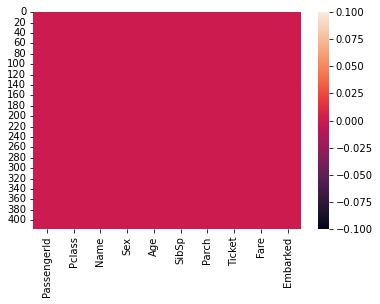

In [92]:
# Now we Visualise null values
sns.heatmap(df_test.isnull())
plt.show()

In [93]:
# Check duplicates
df_test.duplicated().sum()

0

In [94]:
#separate numerical type column and object type column and store in new dataset
df_test_num=df_test.select_dtypes(["int64","float64"])#hold to int and float type data 
df_test_cat=df_test.select_dtypes(object)#hold object type data

In [95]:
# Now change object type into numerical type data by using 
# LabelEncoder
# For that we first import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [96]:
for col in df_test_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    df_test_cat[col]=le.fit_transform(df_test_cat[col])

In [97]:
# Cross check if object type data is convertted into numeric type
df_test_cat.head()

,Name,Sex,Ticket,Embarked
0,206,1,152,1
1,403,0,221,2
2,269,1,73,1
3,408,1,147,2
4,178,0,138,2


In [98]:
df_test_cat.dtypes
# We see the columns with dtat type as object have been successfully converted to int.

Name        int64
Sex         int64
Ticket      int64
Embarked    int64
dtype: object

In [99]:
# Concatenate() means to join 2 dataset df_num and df_cat
df1_test=pd.concat([df_test_num,df_test_cat],axis=1)
df1_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,892,3,34.5,0,0,7.8292,206,1,152,1
1,893,3,47.0,1,0,7.0000,403,0,221,2
2,894,2,62.0,0,0,9.6875,269,1,73,1
3,895,3,27.0,0,0,8.6625,408,1,147,2
4,896,3,22.0,1,1,12.2875,178,0,138,2


In [100]:
df1_test.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int64
Sex              int64
Ticket           int64
Embarked         int64
dtype: object

In [101]:
# Apply standart scaler on test data.
#X=df_t.copy()
df_t1=ss.transform(df1_test)

In [102]:
df_t1

array([[ 1.76772692,  0.80278702,  0.34952369, ...,  0.73108328,
        -0.98611279, -0.71531341],
       [ 1.77166786,  0.80278702,  1.29152603, ..., -1.36783323,
        -0.63322718,  0.56895245],
       [ 1.77560881, -0.40527171,  2.42192884, ...,  0.73108328,
        -1.39014123, -0.71531341],
       ...,
       [ 3.40322017,  0.80278702,  0.65096444, ...,  0.73108328,
         0.00605833,  0.56895245],
       [ 3.40716112,  0.80278702,  0.01040285, ...,  0.73108328,
        -0.63834147,  0.56895245],
       [ 3.41110207,  0.80278702,  0.01040285, ...,  0.73108328,
        -1.22648414, -1.99957926]])

In [103]:
# we create an object t_pred and pass lr.predict to df_t.
t_pred=rfc.predict(df_t1)

In [104]:
# We add column named 'Predicted_Price' on test.csv file
df1_test['Survived']=t_pred
df1_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Survived
0,892,3,34.5,0,0,7.8292,206,1,152,1,0
1,893,3,47.0,1,0,7.0000,403,0,221,2,0
2,894,2,62.0,0,0,9.6875,269,1,73,1,0
3,895,3,27.0,0,0,8.6625,408,1,147,2,0
4,896,3,22.0,1,1,12.2875,178,0,138,2,1


In [105]:
#campaign_id=df3_new_test['campaign_id']
PassengerId=df1_test['PassengerId']

In [106]:
df7={'PassengerId':PassengerId,'Survived':t_pred}
df8=pd.DataFrame(df7)
print(df8)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [107]:
df8.to_csv('My-submission1.csv',index=False)